<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.almanac.com/sites/default/files/styles/landscape/public/image_nodes/iris-flowers.jpg?itok=yVwKlyWK" width="350px" height="180px" />

# <font color= #C20078> Análisis Estadístico Multivariado </font>

- <Strong> `Claudia Celeste Castillejos Jáuregui` </Strong>
- <Strong> `1 mayo 2022`</Strong>
- <Strong> `Practica #5`</Strong>
- <Strong> `claudia.castillejos@iteso.mx` </Strong> 
- <Strong> `Rocio Carrasco Navarro` </Strong> 

### <font color= #C20078> Apéndice </font>

- Portada.
- Introducción.
- Descripción de la base de datos.
- Objetivo.
- Desarrollo.
- Resultados
- Conclusiones.

### <font color= #C20078> Introducción </font>

En esta práctica hablaremos acerca de la base de datos iris, esta base de datos se encuentra en la libreria de sklearn.datasets.Lo que queremos analizar en esta práctica es el análisis de correlación, cuáles son las variables 
que tienen más peso, cuál es el número óptimo de componentes principales.

### <font color= #C20078> Descripción de la base de datos </font>

La base de datos es iris de sklearn.datasets, habla acerca de las plantas. Está tiene 4 variables numéricas. El número de registros es de 150.

Variables:

       - sepal length in cm
       
       - sepal width in cm
       
       - petal length in cm
       
       - petal width in cm
        
Clases:

       - Iris-Setosa
       
       - Iris-Versicolour
       
       - Iris-Virginica

### <font color= #C20078> Objectivo específico </font>

Reducir la dimensión de una base datos construyendo nuevas variables que son combinación lineal de las variables originales llamadas componentes principales. A través de este análisis se podrá determinar cuáles son las variables que tienen más peso en el caso de estudio.

### <font color= #C20078> Objectivo </font>

El objectivo de esta práctica es analizar, interpretar y concluir con base a los datos seleccionados los componentes principales PCA. 

### <font color= #C20078> Desarrollo </font>

In [9]:
# Importamos las librerias
import mglearn 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [10]:
# Base de datos Iris
iris =load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
data= pd.DataFrame(iris.data)
data.columns= iris.feature_names

In [12]:
# Correlación entre variables 
cor=data.corr()
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


#### <font color= #C20078> Resultados </font>

Las variables con mayor correlación son petal length (cm) con sepal length (cm) ,petal length (cm) con petal width (cm) y petal width (cm)	con sepal length (cm). Con respecto a las variables con menor correlación es sepal width (cm) con sepal length (cm)	y sepal width (cm)y petal width (cm). Como interpretacion genrar las vairbales de esta base de datos si tiene una buena correlación.

In [13]:
# Varianza de las variables
print(data.var())

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


#### <font color= #C20078> Resultados </font>

La variable que tiene más variabilidad con respecto a la media es petal length (cm) y la que tiene menos es sepal width (cm)     

In [15]:
# Estandarizar los datos media 0 y desviacion estándar 1
scaler = StandardScaler()
scaler.fit(data)
scaled_data=scaler.transform(data)
scaled_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [18]:
# Algoritmo de PCA
pca = PCA()
# 
pca.fit(scaled_data)
# Ponderación de los componentes principales(vectores propias) 
pca_score= pd.DataFrame(data = pca.components_, columns= data.columns)
pca_score

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


In [19]:
pca_score.shape

(4, 4)

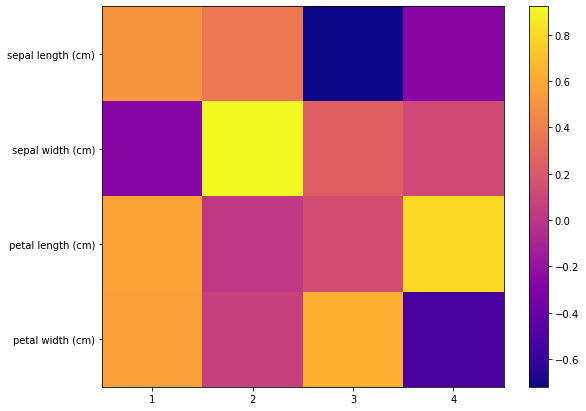

In [20]:
# Mapa de calor para visualizar in influencia de las variables
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,7))
componentes = pca.components_
plt.imshow(componentes.T, cmap='plasma',aspect='auto')
plt.yticks(range(len(data.columns)),data.columns)
plt.xticks(range(len(data.columns)),np.arange(pca.n_components_)+1)
plt.grid(False)
plt.colorbar();

#### <font color= #C20078> Resultados </font>

Las variables que tienen una mayor influencia son: sepal length (cm) y petal width (cm) y la de menor influencia es petal length (cm).

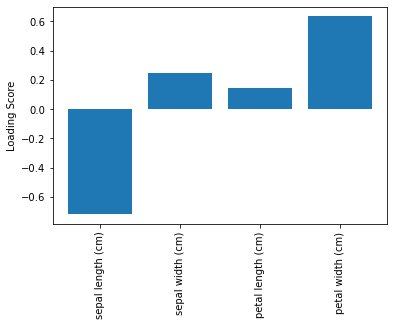

In [22]:
#Aporte al primer componente principal
matrix_transform = pca.components_.T
plt.bar(np.arange(4), matrix_transform[:,2])
plt.xticks(range(len(data.columns)), data.columns,rotation = 90)
plt.ylabel('Loading Score')
plt.show()

#### <font color= #C20078> Resultados </font>

En esta grafica de barras se muestra el primer  aporte al componente principal de las variables

In [24]:
loading_scores = pd.DataFrame(pca.components_[0])
#Nombre de las columnas
loading_scores.index=iris.feature_names
#Ordena de mayor a menor los pesos 
sorted_loading_scores = loading_scores[0].abs().sort_values(ascending=False)
#Selección de las 2 variables que más aportan a cada componente principal
top_2_variables= sorted_loading_scores[0:2].index.values
print(top_2_variables)

['petal length (cm)' 'petal width (cm)']


#### <font color= #C20078> Resultados </font>

Estas son las 2 variables que más aportan a cada componente principal

In [27]:
# Nuevas variables, componentes principales 
pca_data=pca.transform(scaled_data)
# Dimensión de los datos 
pca_data.shape


(150, 4)

In [28]:
# Porcentaje de varianza explicada por cada componente principal proporciona 
# Lambda/suma_Lambda (valor_propio/suma_valores_propios)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
#Porcentaje de varianza acumulado de los componentes
porcent_acum = np.cumsum(per_var)
porcent_acum

array([ 73. ,  95.9,  99.6, 100.1])

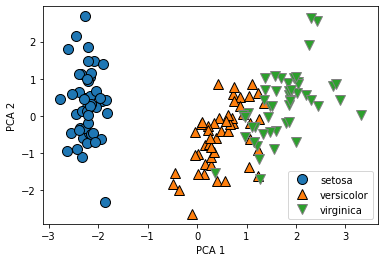

In [30]:
#Graficar componentes principales
mglearn.discrete_scatter(pca_data[:,0],pca_data[:,1], iris.target)
plt.legend(iris.target_names, loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#### <font color= #C20078> Resultados </font>

Solo se necesitaron 2 componentes principales para graficar las clases. Los dos componentes principales correponden al 95.9% de la varianza

### <font color= #C20078> Conclusiones </font>

Durante esta practica recordamos los conocimientos previos acerca de el PCA , al hacer un caso practico con la base de datos de iris. Logramos identificar si las variables tenian correlación o no, las variables que tienen mas peso y el numero optimo de componentes principales. 